In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
( X_train, y_train ), ( X_test, y_test ) = tf.keras.datasets.cifar10.load_data( )

In [3]:
print( "Training set:", X_train.shape )
print( "Testing set:", X_test.shape )

Training set: (50000, 32, 32, 3)
Testing set: (10000, 32, 32, 3)


The last number 3 (RGB) implies that the images are colorful, but not grayscale.

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train = y_train.reshape( -1, )
y_test = y_test.reshape( -1, )
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

According to the official website of the dataset, the following are the names of the classes:

In [7]:
y_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

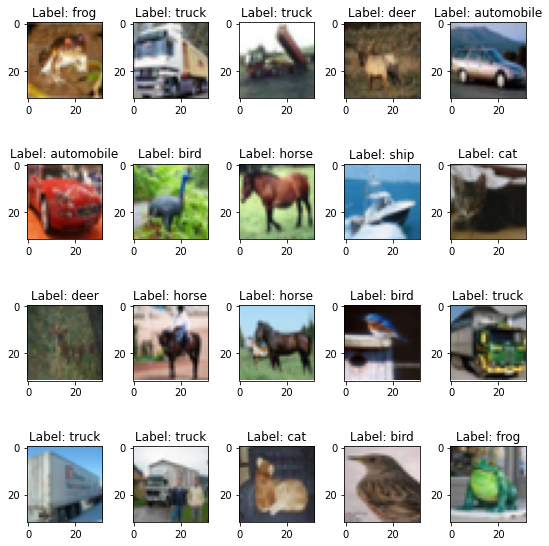

In [8]:
def plot_sample( X, y, labels, how_many ):
    if how_many % 2 == 1:
        how_many -= 1
    
    num_rows = int( np.round( np.sqrt( how_many ) ) )
    num_cols = how_many // num_rows
    
    images = X[:how_many]
    label = [labels[i] for i in y[:how_many]]

    # plot images
    fig, axes = plt.subplots( num_rows, num_cols, figsize = ( 1.5 * num_cols, 2 * num_rows ) )
    for i in range( how_many ):
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow( images[i] )
        ax.set_title( "Label: {}".format( label[i] ) )
    plt.tight_layout( )
    plt.show( )
    
    
plot_sample( X_train, y_train, y_labels, how_many = 20 )

In [9]:
# Normalizing the dataset within the [0, 1] range.
X_train = X_train.astype( "float" )
X_test = X_test.astype( "float" )

X_train /= 255
X_test /= 255

In [10]:
# Trying to create a model using just Dense layers.
model = tf.keras.Sequential( [
    tf.keras.layers.Flatten( input_shape = ( 32, 32, 3 ) ),
    tf.keras.layers.Dense( units = 3000, activation = "relu" ),
    tf.keras.layers.Dense( units = 1000, activation = "relu" ),
    tf.keras.layers.Dense( units = 10, activation = "softmax" )
] )

model.compile( loss = tf.keras.losses.SparseCategoricalCrossentropy( ),
               optimizer = "Adam",
               metrics = ["accuracy"] )

model.fit( X_train, y_train, epochs = 10, validation_split = 0.15 )

Epoch 1/10
1329/1329 [==============================] - 11s 7ms/step - loss: 1.9210 - accuracy: 0.3145 - val_loss: 1.8894 - val_accuracy: 0.3260
Epoch 2/10
1329/1329 [==============================] - 10s 7ms/step - loss: 1.6870 - accuracy: 0.3929 - val_loss: 1.6524 - val_accuracy: 0.4109
Epoch 3/10
1329/1329 [==============================] - 10s 7ms/step - loss: 1.6000 - accuracy: 0.4303 - val_loss: 1.6003 - val_accuracy: 0.4377
Epoch 4/10
1329/1329 [==============================] - 10s 7ms/step - loss: 1.5538 - accuracy: 0.4403 - val_loss: 1.5806 - val_accuracy: 0.4344
Epoch 5/10
1329/1329 [==============================] - 10s 8ms/step - loss: 1.5156 - accuracy: 0.4573 - val_loss: 1.6562 - val_accuracy: 0.4180
Epoch 6/10
1329/1329 [==============================] - 10s 7ms/step - loss: 1.4869 - accuracy: 0.4699 - val_loss: 1.5603 - val_accuracy: 0.4439
Epoch 7/10
1329/1329 [==============================] - 16s 12ms/step - loss: 1.4622 - accuracy: 0.4746 - val_loss: 1.5387 - val_a

In [11]:
model.evaluate( X_test, y_test )

313/313 [==============================] - 1s 2ms/step - loss: 1.4856 - accuracy: 0.4763


[1.4855709075927734, 0.4763000011444092]

As it can be seen, the model that uses just Dense layers performs really badly on this dataset.
## Let's try using CNN.

In [12]:
model = tf.keras.Sequential( [
    # Using 32 filters, each of size 3x3
    tf.keras.layers.Conv2D( filters = 32, kernel_size = ( 3, 3 ), activation = "relu", input_shape = ( 32, 32, 3 ) ),
    tf.keras.layers.MaxPool2D( pool_size = ( 2, 2 ) ),
    
    tf.keras.layers.Conv2D( filters = 64, kernel_size = ( 3, 3 ), activation = "relu" ),
    tf.keras.layers.MaxPool2D( pool_size = ( 2, 2 ) ),
    
    # Flattening the resultant matrices
    tf.keras.layers.Flatten( ),
    
    tf.keras.layers.Dense( units = 64, activation = "relu" ),
    tf.keras.layers.Dropout( 0.3 ),
    tf.keras.layers.Dense( units = 32, activation = "relu" ),
    tf.keras.layers.Dropout( 0.3 ),
    tf.keras.layers.Dense( units = 10, activation = "softmax" )
] )

model.compile( loss = tf.keras.losses.SparseCategoricalCrossentropy( ),
               optimizer = "Adam",
               metrics = ["accuracy"] )

history = model.fit( X_train, y_train, epochs = 15, validation_split = 0.15 )

Epoch 1/15
1329/1329 [==============================] - 9s 5ms/step - loss: 1.8344 - accuracy: 0.3092 - val_loss: 1.4417 - val_accuracy: 0.4899
Epoch 2/15
1329/1329 [==============================] - 6s 4ms/step - loss: 1.4873 - accuracy: 0.4583 - val_loss: 1.2385 - val_accuracy: 0.5719
Epoch 3/15
1329/1329 [==============================] - 6s 4ms/step - loss: 1.3334 - accuracy: 0.5261 - val_loss: 1.2076 - val_accuracy: 0.5844
Epoch 4/15
1329/1329 [==============================] - 6s 4ms/step - loss: 1.2429 - accuracy: 0.5616 - val_loss: 1.1005 - val_accuracy: 0.6240
Epoch 5/15
1329/1329 [==============================] - 6s 4ms/step - loss: 1.1691 - accuracy: 0.5896 - val_loss: 1.0423 - val_accuracy: 0.6425
Epoch 6/15
1329/1329 [==============================] - 6s 4ms/step - loss: 1.1136 - accuracy: 0.6107 - val_loss: 1.0030 - val_accuracy: 0.6539
Epoch 7/15
1329/1329 [==============================] - 6s 5ms/step - loss: 1.0695 - accuracy: 0.6285 - val_loss: 0.9956 - val_accuracy:

In [13]:
model.evaluate( X_test, y_test )

313/313 [==============================] - 1s 3ms/step - loss: 0.9487 - accuracy: 0.6866


[0.9486980438232422, 0.6866000294685364]

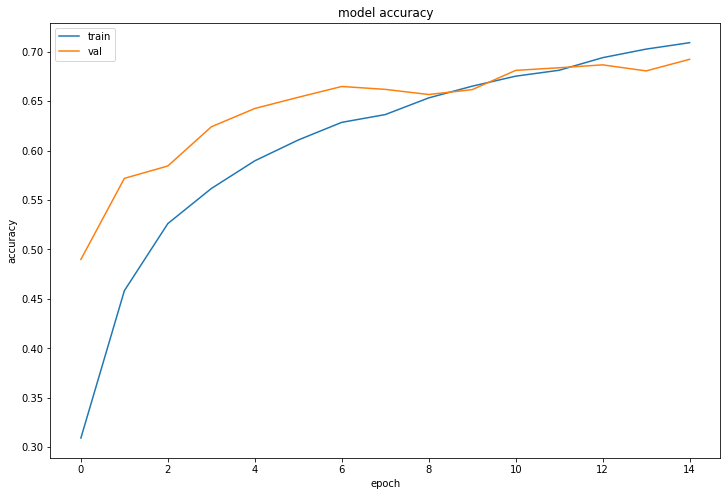

In [14]:
plt.figure( figsize = ( 12, 8 ) )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

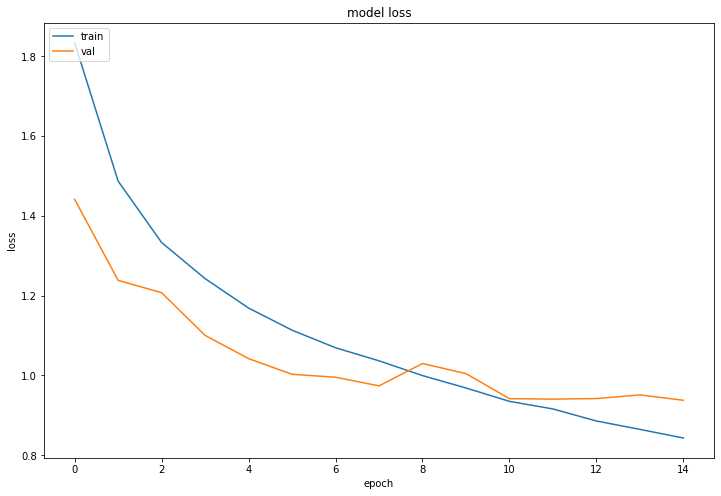

In [15]:
plt.figure( figsize = ( 12, 8 ) )
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

This is actually much better than the first model, as the value of `test accuracy` increased to over 68% and the value of `test loss` comprised almost 0.95.

In [16]:
y_pred = model.predict( X_test )
y_pred

313/313 [==============================] - 1s 3ms/step


array([[1.0178640e-03, 1.2112671e-03, 2.4883781e-02, ..., 7.5615486e-03,
        4.3138056e-03, 1.6165737e-03],
       [2.5723824e-02, 2.4085131e-01, 1.1958036e-06, ..., 1.1711082e-09,
        7.2259289e-01, 1.0830652e-02],
       [3.2381198e-01, 1.3783261e-01, 4.5393478e-02, ..., 2.5759680e-02,
        1.3733283e-01, 2.4043101e-01],
       ...,
       [9.2010116e-05, 2.2834603e-05, 2.5513381e-02, ..., 1.9263413e-02,
        3.3478442e-05, 1.2639946e-04],
       [1.9066138e-02, 9.7705245e-01, 6.2687811e-04, ..., 2.9044468e-05,
        2.2840276e-04, 1.9984713e-03],
       [1.0840339e-09, 3.0046503e-13, 9.0223602e-07, ..., 9.9963534e-01,
        6.1798520e-15, 2.1918793e-11]], dtype=float32)

In [17]:
y_predictions = np.array( [np.argmax( i ) for i in y_pred] )
y_predictions

array([3, 8, 0, ..., 5, 1, 7], dtype=int64)

In [18]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [21]:
def plot_sample_with_preds( X, y, predictions, labels, how_many ):
    if how_many % 2 == 1:
        how_many -= 1
    
    num_rows = int( np.round( np.sqrt( how_many ) ) )
    num_cols = how_many // num_rows
    
    images = X[:how_many]
    label = y[:how_many]
    pred = predictions[:how_many]
#     label = [labels[i] for i in y[:how_many]]
#     pred = [labels[i] for i in predictions[:how_many]]

    # plot images
    fig, axes = plt.subplots( num_rows, num_cols, figsize = ( 1.5 * num_cols, 2 * num_rows ) )
    for i in range( how_many ):
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow( images[i] )
        ax.set_title( "Label: {}, Pred: {}".format( label[i], pred[i] ) )
    plt.tight_layout( )
    plt.show( )

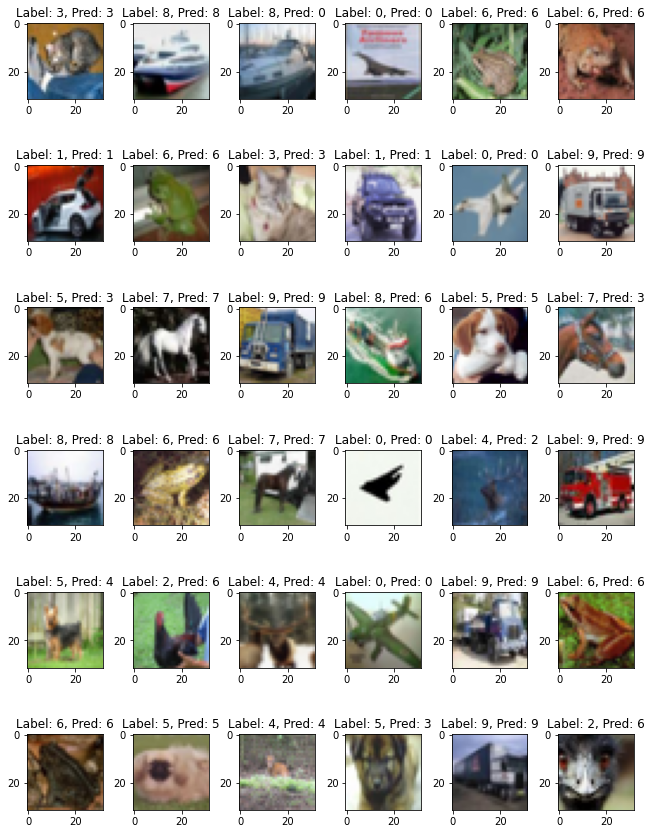

In [22]:
plot_sample_with_preds( X_test, y_test, y_predictions, y_labels, how_many = 36 )